# Project: Wrangling and Analyze Data

### Import Libraries 

In [391]:
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import datetime
import os
import json
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [17]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
#df.sample(5)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
print(r.status_code)
with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

200


In [4]:
df_image_pred = pd.read_csv('image-predictions.tsv',sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:



consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [9]:
892420643555336193
tweet = api.get_status(891327558926688256)

In [10]:
total_tweets = len(df.tweet_id)
total_tweets

2356

Extracting the tweets from twitter

In [11]:
tweets = []
errors = []
num = 1

for d in df.tweet_id:
    try:
        start = time.time()
        tweet = api.get_status(d)
        end = time.time()
        diff = (end - start) #calculates the query time for each tweet ID
        print(' Tweet {} of {} takes {} secs'.format(num,total_tweets,diff))
        tweets.append(tweet)
        num += 1
            
        
    except Exception as e:
        print('Tweet {} has the error: {}'.format(d,e))
        errors.append(d)

    

 Tweet 1 of 2356 takes 0.7907381057739258 secs
 Tweet 2 of 2356 takes 0.6440701484680176 secs
 Tweet 3 of 2356 takes 0.6205031871795654 secs
 Tweet 4 of 2356 takes 0.6524460315704346 secs
 Tweet 5 of 2356 takes 0.6863880157470703 secs
 Tweet 6 of 2356 takes 0.5714828968048096 secs
 Tweet 7 of 2356 takes 0.5749461650848389 secs
 Tweet 8 of 2356 takes 1.1995048522949219 secs
 Tweet 9 of 2356 takes 0.733424186706543 secs
 Tweet 10 of 2356 takes 0.6600511074066162 secs
 Tweet 11 of 2356 takes 0.6178560256958008 secs
 Tweet 12 of 2356 takes 0.6756458282470703 secs
 Tweet 13 of 2356 takes 0.6461858749389648 secs
 Tweet 14 of 2356 takes 0.5963728427886963 secs
 Tweet 15 of 2356 takes 0.7498631477355957 secs
 Tweet 16 of 2356 takes 1.0936009883880615 secs
 Tweet 17 of 2356 takes 0.6035621166229248 secs
 Tweet 18 of 2356 takes 0.7423968315124512 secs
 Tweet 19 of 2356 takes 0.6194519996643066 secs
Tweet 888202515573088257 has the error: 404 Not Found
144 - No status found with that ID.
 Tweet 2

Rate limit reached. Sleeping for: 393


 Tweet 871 of 2356 takes 395.0531578063965 secs
 Tweet 872 of 2356 takes 0.5304830074310303 secs
 Tweet 873 of 2356 takes 0.5084407329559326 secs
 Tweet 874 of 2356 takes 0.49669384956359863 secs
 Tweet 875 of 2356 takes 0.4969010353088379 secs
 Tweet 876 of 2356 takes 0.5000629425048828 secs
 Tweet 877 of 2356 takes 0.7149050235748291 secs
 Tweet 878 of 2356 takes 0.504680871963501 secs
 Tweet 879 of 2356 takes 0.5199370384216309 secs
 Tweet 880 of 2356 takes 0.8557491302490234 secs
 Tweet 881 of 2356 takes 0.48814892768859863 secs
 Tweet 882 of 2356 takes 0.5053386688232422 secs
 Tweet 883 of 2356 takes 0.5252418518066406 secs
 Tweet 884 of 2356 takes 0.534754753112793 secs
 Tweet 885 of 2356 takes 0.5552332401275635 secs
 Tweet 886 of 2356 takes 0.4857139587402344 secs
 Tweet 887 of 2356 takes 0.5072677135467529 secs
 Tweet 888 of 2356 takes 0.5191001892089844 secs
 Tweet 889 of 2356 takes 0.5243370532989502 secs
 Tweet 890 of 2356 takes 0.5317189693450928 secs
 Tweet 891 of 2356 ta

Rate limit reached. Sleeping for: 413


 Tweet 1769 of 2356 takes 415.02244997024536 secs
 Tweet 1770 of 2356 takes 0.6147172451019287 secs
 Tweet 1771 of 2356 takes 0.5216381549835205 secs
 Tweet 1772 of 2356 takes 0.5442330837249756 secs
 Tweet 1773 of 2356 takes 0.5438008308410645 secs
 Tweet 1774 of 2356 takes 0.5214240550994873 secs
 Tweet 1775 of 2356 takes 0.532343864440918 secs
 Tweet 1776 of 2356 takes 0.5073878765106201 secs
 Tweet 1777 of 2356 takes 0.5123980045318604 secs
 Tweet 1778 of 2356 takes 0.5146188735961914 secs
 Tweet 1779 of 2356 takes 0.5276081562042236 secs
 Tweet 1780 of 2356 takes 0.5060968399047852 secs
 Tweet 1781 of 2356 takes 0.5231170654296875 secs
 Tweet 1782 of 2356 takes 0.551630973815918 secs
 Tweet 1783 of 2356 takes 0.528221845626831 secs
 Tweet 1784 of 2356 takes 0.543057918548584 secs
 Tweet 1785 of 2356 takes 0.5393908023834229 secs
 Tweet 1786 of 2356 takes 0.5239560604095459 secs
 Tweet 1787 of 2356 takes 0.5286052227020264 secs
 Tweet 1788 of 2356 takes 0.5247921943664551 secs
 Twe

In [12]:
print('Tweets successfully extracted: {}'.format(len(tweets)))
print('Errors encountered: {}'.format(len(errors)))

Tweets successfully extracted: 2325
Errors encountered: 31


#### storing the  file in json and writing to tweet_json.txt

In [13]:
tweet_json = []
#store the json elements of the files
for tweet in tweets:
    tweet_json.append(tweet._json)

In [14]:
with open('tweet_json.txt','w') as file:
    file.write(json.dumps(tweet_json,indent=4))

#### Loading file to Pandas

In [15]:
tweet_data = []
with open('tweet_json.txt', encoding='utf-8') as json_data:  
    full_data = json.load(json_data)
    for tweet in full_data:
        tweet_id = tweet['id']
        tweet_text = tweet['text']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        created_at = tweet['created_at']

        tweet_data.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at
                            })
        tweet_combined = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at'])
    

In [16]:
tweet_combined.head()

,tweet_id,favorite_count,retweet_count,created_at
0,892420643555336193,32866,6875,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,28395,5177,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,21341,3420,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,35831,7082,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,34278,7591,Sat Jul 29 16:00:24 +0000 2017


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visually accessing our the data

In [32]:
df_archive.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667832474...,12,10,None,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
190,855857698524602368,NaN,NaN,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",NaN,NaN,NaN,https://twitter.com/perfy/status/8558573181681...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,10,10,None,None,None,None,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
417,822489057087389700,NaN,NaN,2017-01-20 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She really wanted to be presi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822489057...,13,10,Paisley,None,None,None,None


In [22]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [64]:
df_image_pred['jpg_url'].duplicated().sum()

66

In [66]:
df_image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [74]:
df_image_pred.p1.value_counts().sample(10)

pot                 1
chimpanzee          2
picket_fence        1
box_turtle          2
coho                1
German_shepherd    20
lorikeet            1
pencil_box          1
wallaby             2
hog                 4
Name: p1, dtype: int64

In [99]:
df_image_pred


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [95]:
tweet_combined

,tweet_id,favorite_count,retweet_count,created_at
0,892420643555336193,32866,6875,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,28395,5177,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,21341,3420,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,35831,7082,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,34278,7591,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2320,666049248165822465,85,35,Mon Nov 16 00:24:50 +0000 2015
2321,666044226329800704,243,113,Mon Nov 16 00:04:52 +0000 2015
2322,666033412701032449,98,35,Sun Nov 15 23:21:54 +0000 2015
2323,666029285002620928,111,39,Sun Nov 15 23:05:30 +0000 2015


#### Programmatic Accessment

In [25]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
tweet_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   favorite_count  2325 non-null   int64 
 2   retweet_count   2325 non-null   int64 
 3   created_at      2325 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [29]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
tweet_combined.describe()

,favorite_count,retweet_count
count,2325.000000,2325.000000
mean,6864.540215,2424.020215
std,10661.825325,4103.363961
min,0.000000,0.000000
25%,1196.000000,487.000000
50%,2975.000000,1127.000000
75%,8390.000000,2804.000000
max,141562.000000,69384.000000


#### Checking if any duplicate data exists in the tables

In [75]:

df_image_pred.jpg_url.duplicated().sum()

66

In [100]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [76]:
df_archive.duplicated().sum()

0

In [118]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [77]:
df_archive.name.value_counts().sample(20)

Stephanus    1
Vinscent     1
Kyro         2
Patrick      2
Howie        1
Ester        1
Bronte       1
Wyatt        3
Jerry        4
Jameson      1
Kulet        1
Cedrick      1
Superpup     1
Tilly        1
Harnold      1
Rocco        2
Chubbs       1
Frankie      3
Doobert      1
Shaggy       2
Name: name, dtype: int64

### Quality issues : I will group the issues by tables

#### In df.archive table
1. A lot of missing values in the following columns : in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp


2. Incorrect Datatype in Timestamp column


3. Incorrect/Not valid Dog names in Name column and 'None' names in Name columns


4. Source column is a html-href attribute, not descriptive.


5. Expanded urls is not needed for further analysis


#### Tweet Combined Table

6. Retweets present 

7. Replies Presents

8. incorrect datetype for time



#### All Tables 
9. Incorrect Datatype for TweetID




## Tidiness issues

#### Tweet Combined Table
1. Multiple variables ( date variables such as Day of week, MONTH,TIME ) in the created_at column

#### in df_archive Table
2. The 4 dog stages are in different columns. They should be merged to one column in the cleaning stage

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [102]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_image_pred_copy = df_image_pred.copy()
tweet_combined_copy = tweet_combined.copy()

### Issue #1:

#### Define: 

Let's remove the retweets from the df_archive_copy table, we first get the retweet tweets ids and store them in a variable for later use

#### Code

In [265]:
retweet_ids = list(df_archive[df_archive['retweeted_status_id'].notnull()].tweet_id)
reply_ids = list(df_archive[df_archive['in_reply_to_status_id'].notnull()].tweet_id)
print(type(retweet_ids))

<class 'list'>


In [156]:

#df_archive_copy = #df_archive_copy[(df_archive_copy['retweeted_status_id'].isnull()) & df_archive_copy['in_reply_to_status_id'].isnull()]


#no retweets tweets or reply tweeets 

In [157]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 277.5+ KB


#### Now dropping these columns from df_archive

In [143]:
df_archive_copy.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace = True)

/var/folders/c9/wsbplzwx6jl3p16j28v3zqqc0000gn/T/ipykernel_5206/1490866496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace = True)


In [158]:
df_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [150]:
df_image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Test

In [159]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:

#### Define : Change the datatype for the Timestamp column from object to datetime

#### Code

In [162]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

/var/folders/c9/wsbplzwx6jl3p16j28v3zqqc0000gn/T/ipykernel_5206/4184491546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)


#### Test

In [163]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue 3

#### Define: 

Change the Incorrect/Not valid Dog names in Name column and 'None' names in Name columns drop the rows that have the None and other names that are not dog names. It is noticed that names that begin with lower cases are not valid dog names 


#### Code: 

Finding lowercase names and dropping them

In [185]:
lower_cap = [x[0].islower() for x in df_archive_copy.name] 

In [198]:
df_archive_copy.drop(df_archive_copy.loc[lower_cap].index,axis=0,inplace = True)

/var/folders/c9/wsbplzwx6jl3p16j28v3zqqc0000gn/T/ipykernel_5206/101221525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy.drop(df_archive_copy.loc[lower_cap].index,axis=0,inplace = True)


##### dropping the rows in that have 'None' as Name 

In [204]:
df_archive_copy = df_archive_copy.drop(df_archive_copy.loc[df_archive_copy.name == 'None'].index,axis=0)

#### Test:

In [205]:
df_archive_copy.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

In [216]:
df_archive_copy.name.sample(10)

1024      Shiloh
2148    Clarence
1730       Bruce
2262      George
48         Rusty
1271       Billy
681       Butter
29        Roscoe
2275     Cupcake
2103        Bloo
Name: name, dtype: object

### Issue 4 :



#### Define:
Extract the Source device from the is a html-href attribute.

#### Code:


In [218]:
df_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1324
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

#### Define Function to extract source

In [219]:
def extract_source(x):
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'iPhone'
    elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        return 'Vine'
    elif x == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        return 'Web Client'
    else:
        return 'TweetDeck'

In [220]:
df_archive_copy.source = df_archive_copy.source.apply(extract_source)

#### Test:

In [225]:
df_archive_copy.source.value_counts()

iPhone        1324
Vine            41
Web Client      16
TweetDeck        9
Name: source, dtype: int64

### Issue 5

#### Define:

Remove the expanded URLS column from the df_archive table as they will not be needed for futher analysis

#### Code:


In [235]:
df_archive_copy = df_archive_copy.drop(columns='expanded_urls',axis=1)

#### Test:

In [238]:
df_archive_copy.info()

### Issue 6

#### Define: 
Remove retweeted tweets from the tweet_combined table, using the Retweet_ID's we saved earlier 

#### Code:

In [246]:
tweet_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   favorite_count  2325 non-null   int64 
 2   retweet_count   2325 non-null   int64 
 3   created_at      2325 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [282]:
retweet_pos = [int(x) in retweet_ids for x in tweet_combined.tweet_id]

In [287]:
tweet_combined_copy = tweet_combined_copy.drop(tweet_combined_copy.loc[retweet_pos].index, axis = 0) #drop retweets

#### Test

In [292]:
#tweet_combined_copy.info()

### ISSUE 7

#### DEFINE:
Remove the tweets that are replies from the archive

#### Code 

In [293]:
reply_pos = [int(x) in reply_ids for x in tweet_combined_copy.tweet_id]

In [294]:
tweet_combined_copy = tweet_combined_copy.drop(tweet_combined_copy.loc[reply_pos].index,axis=0)

#### TEST 

In [295]:
tweet_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2089 non-null   object
 1   favorite_count  2089 non-null   int64 
 2   retweet_count   2089 non-null   int64 
 3   created_at      2089 non-null   object
dtypes: int64(2), object(2)
memory usage: 81.6+ KB


### Issue 8

#### Define
Change the Created_at column in the Tweet_combined table from str to datetime

#### Code

In [320]:
tweet_combined_copy.created_at = pd.to_datetime(tweet_combined_copy.created_at)

####  Test

In [308]:
tweet_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2089 non-null   object             
 1   favorite_count  2089 non-null   int64              
 2   retweet_count   2089 non-null   int64              
 3   created_at      2089 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 81.6+ KB


### ISSUE 9: 

#### DEFINE : 
Correct the Incorrect Datatype for TweetID For all Tables. The TweetID should be a string 

#### Code

In [296]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1390 non-null   int64              
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   source              1390 non-null   object             
 3   text                1390 non-null   object             
 4   rating_numerator    1390 non-null   int64              
 5   rating_denominator  1390 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               1390 non-null   object             
 8   floofer             1390 non-null   object             
 9   pupper              1390 non-null   object             
 10  puppo               1390 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 162.6+ KB


In [297]:
df_image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [298]:
tweet_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2089 non-null   object
 1   favorite_count  2089 non-null   int64 
 2   retweet_count   2089 non-null   int64 
 3   created_at      2089 non-null   object
dtypes: int64(2), object(2)
memory usage: 81.6+ KB


In [301]:
df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype('str')
df_image_pred_copy.tweet_id = df_image_pred_copy.tweet_id.astype('str')

#### Test

In [303]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1390 non-null   object             
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   source              1390 non-null   object             
 3   text                1390 non-null   object             
 4   rating_numerator    1390 non-null   int64              
 5   rating_denominator  1390 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               1390 non-null   object             
 8   floofer             1390 non-null   object             
 9   pupper              1390 non-null   object             
 10  puppo               1390 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 162.6+ KB


In [304]:
df_image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [305]:
tweet_combined_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2089 non-null   object
 1   favorite_count  2089 non-null   int64 
 2   retweet_count   2089 non-null   int64 
 3   created_at      2089 non-null   object
dtypes: int64(2), object(2)
memory usage: 81.6+ KB


## Tidiness Issues

### Issue 1

#### Define

The Multiple variables ( date variables such as Day of week, MONTH,TIME ) in the created_at column does not look organised. Let's create columns for date and time

#### Code

In [312]:
tweet_combined.created_at.sample(2) #messy date format in the tweet combined table, incorrect datatype

1321    Sun Feb 28 21:25:30 +0000 2016
2057    Sun Nov 29 02:33:32 +0000 2015
Name: created_at, dtype: object

In [314]:
tweet_combined_copy.created_at.sample(2) #After the appropraite datetime is used (Datetime) , we can still work on it a little 

1081   2016-05-20 02:18:32+00:00
722    2016-09-25 23:47:39+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [339]:
tweet_combined_copy['post_date'] = tweet_combined_copy.created_at.dt.date


In [338]:
tweet_combined_copy['post_time'] = tweet_combined_copy.created_at.dt.time

In [342]:
tweet_combined_copy.drop('created_at',axis=1,inplace=True)

#### Test

In [343]:
tweet_combined_copy.head()

,tweet_id,favorite_count,retweet_count,post_time,post_date
0,892420643555336193,32866,6875,16:23:56,2017-08-01
1,892177421306343426,28395,5177,00:17:27,2017-08-01
2,891815181378084864,21341,3420,00:18:03,2017-07-31
3,891689557279858688,35831,7082,15:58:51,2017-07-30
4,891327558926688256,34278,7591,16:00:24,2017-07-29


SINCE WE HAVE FORMATTED THE TIMESTAMP COLUMP IN THE TWEETCOMBINED TABLE, WE CAN DROP THE TIME STAMP COLUMN IN THE DF_ARCHIVE TABLE FOR CONSISTENCY 

In [359]:
df_archive_copy = df_archive_copy.drop('timestamp',axis=1)

### ISSUE 2 

#### Define : 
The 4 dog stage names should be put in a single column. 

#### Code

In [347]:
df_archive_copy.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [351]:
df_archive_copy.puppo.value_counts()

None     1374
puppo      16
Name: puppo, dtype: int64

In [354]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    df_archive_copy[stage] = df_archive_copy[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
df_archive_copy['stage'] = df_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_archive_copy['stage'] = df_archive_copy['stage'].apply(lambda x: x.replace('nan', ''))
df_archive_copy['stage'] = df_archive_copy['stage'].apply(lambda x: np.NaN if x == '' else x)

df_archive_copy['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [356]:
df_archive_copy.stage.value_counts()

pupper          121
doggo            38
puppo            16
floofer           5
doggo pupper      4
Name: stage, dtype: int64

In [357]:
#drop the doggo floofer pupper and puppo columns
df_archive_copy = df_archive_copy.drop(['doggo','floofer','pupper','puppo'],axis = 1)

#### Test 

In [360]:
df_archive_copy.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


Removing the rows the where rating denominator is higher or lower than 10 for consistency 

In [384]:
wrong_denom = (df_archive_copy.rating_denominator > 10) | (df_archive_copy.rating_denominator <10)

In [386]:
df_archive_copy = df_archive_copy.drop(df_archive_copy.loc[wrong_denom].index,axis=0)

Remove the Outlier ratings from the df_archive so it doesn't skew the ratings data for visualization

In [400]:
df_archive_copy = df_archive_copy.drop(df_archive_copy.loc[df_archive_copy.rating_numerator > 50].index,axis=0)

### COMBINE ALL TABLES

In [401]:
combined_df = pd.merge(df_archive_copy, df_image_pred_copy, on='tweet_id')

In [402]:
combined_df = pd.merge(combined_df,tweet_combined_copy, on='tweet_id')

In [403]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1336
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1337 non-null   object 
 1   source              1337 non-null   object 
 2   text                1337 non-null   object 
 3   rating_numerator    1337 non-null   int64  
 4   rating_denominator  1337 non-null   int64  
 5   name                1337 non-null   object 
 6   stage               176 non-null    object 
 7   jpg_url             1337 non-null   object 
 8   img_num             1337 non-null   int64  
 9   p1                  1337 non-null   object 
 10  p1_conf             1337 non-null   float64
 11  p1_dog              1337 non-null   bool   
 12  p2                  1337 non-null   object 
 13  p2_conf             1337 non-null   float64
 14  p2_dog              1337 non-null   bool   
 15  p3                  1337 non-null   object 
 16  p3_con

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Distribution of ratings


2. Top 10 dogs with the highest average rating 
 

3. Most Common named dogs 

In [404]:
combined_df.rating_numerator.value_counts()

12    324
11    301
10    271
13    172
9     100
8      70
7      32
14     17
6      17
5      14
3      10
4       5
2       3
27      1
Name: rating_numerator, dtype: int64

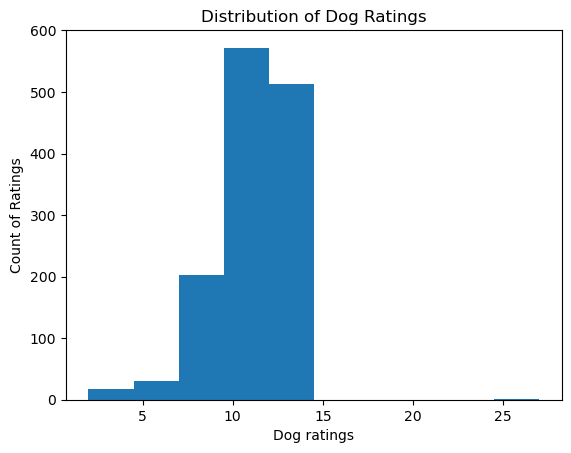

In [408]:
plt.hist(combined_df.rating_numerator);
plt.xlabel('Dog ratings');
plt.ylabel('Count of Ratings');
plt.title('Distribution of Dog Ratings');

#### 2. Top 10 dog names with the highest average rating 


In [413]:
combined_df_avg = combined_df.groupby('name')['rating_numerator'].mean().sort_values(ascending=False).head(10)

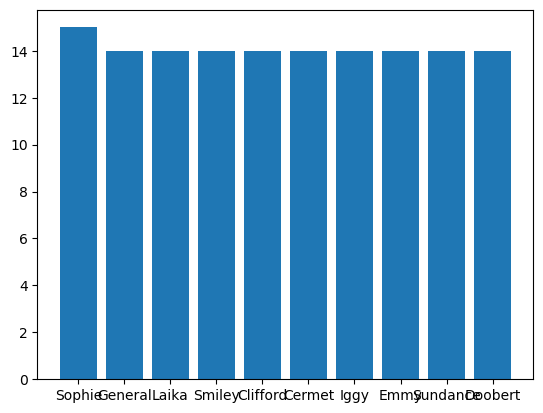

In [420]:
plt.bar(combined_df_avg.index,combined_df_avg.values);

#### 3. The Most Common named dogs 

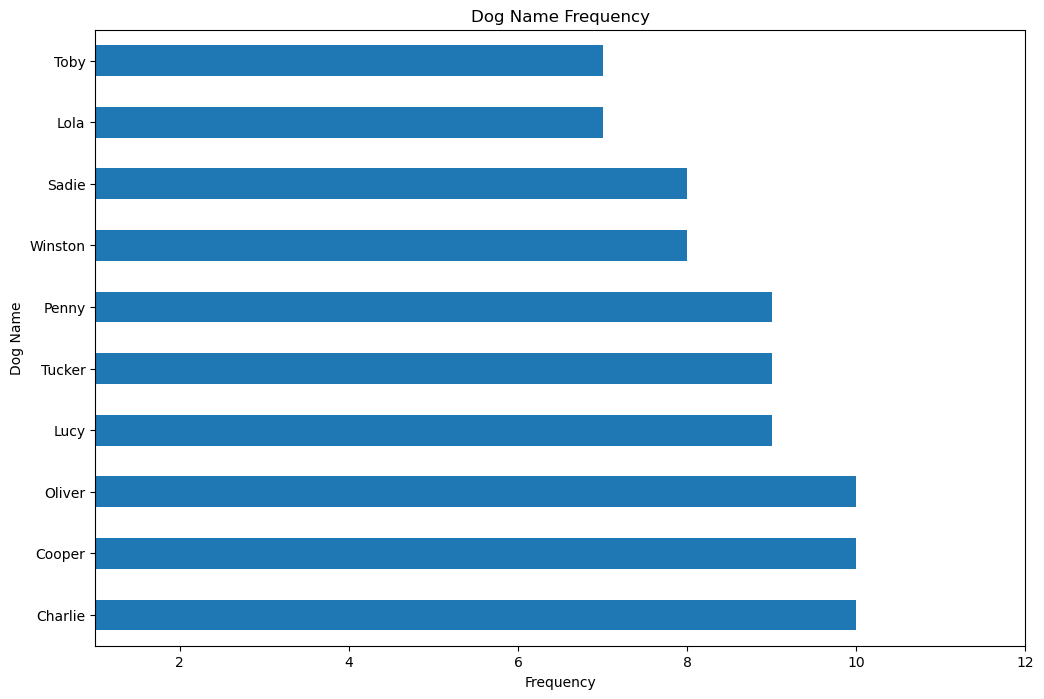

In [423]:
plt.figure(figsize=(12, 8))
dog_names = combined_df.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 12);

### STORING THE CLEANED DATA 

In [425]:
combined_df.to_csv('twitter_archive_master.csv',index=False)